In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
working_directory = r"C:\Users\Administrator\Desktop\PYTHON\Projects\insurance data"
os.chdir(working_directory)

In [3]:
data = pd.read_csv("insurance_data.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['sex', 'region', 'smoker']

# Encode the specified columns
for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])


In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,3,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Data Visualization

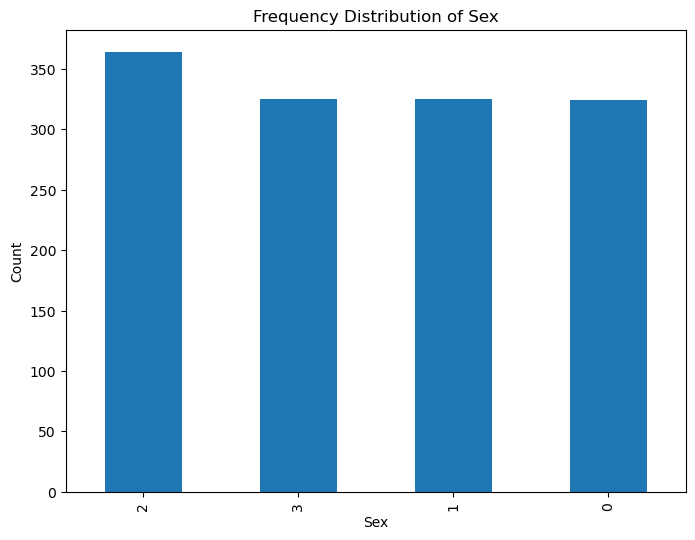

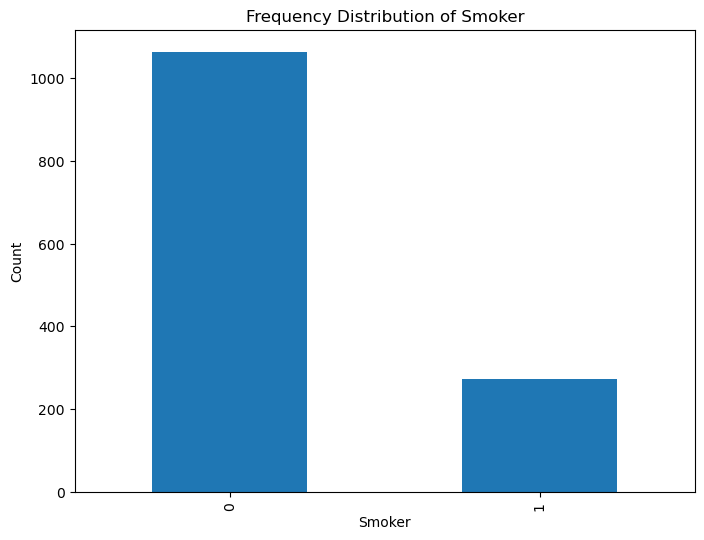

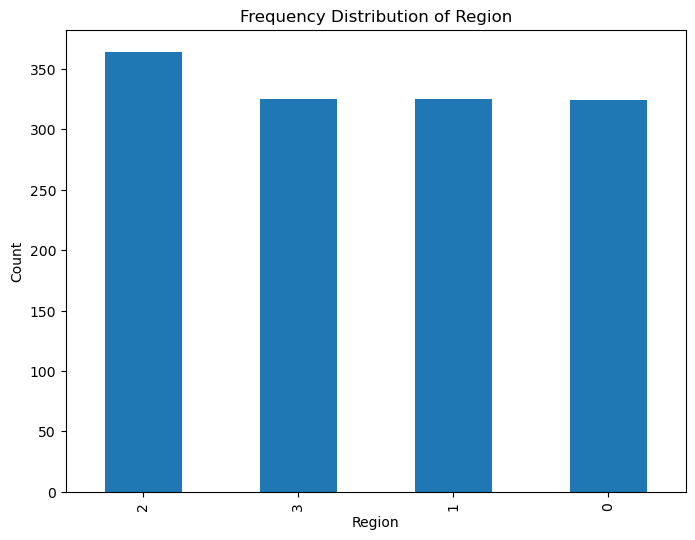

In [25]:
import matplotlib.pyplot as plt

# Create a bar plot for 'sex'
plt.figure(figsize=(8, 6))
data['sex'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Create a bar plot for 'smoker'
plt.figure(figsize=(8, 6))
data['smoker'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Create a bar plot for 'region'
plt.figure(figsize=(8, 6))
data['region'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

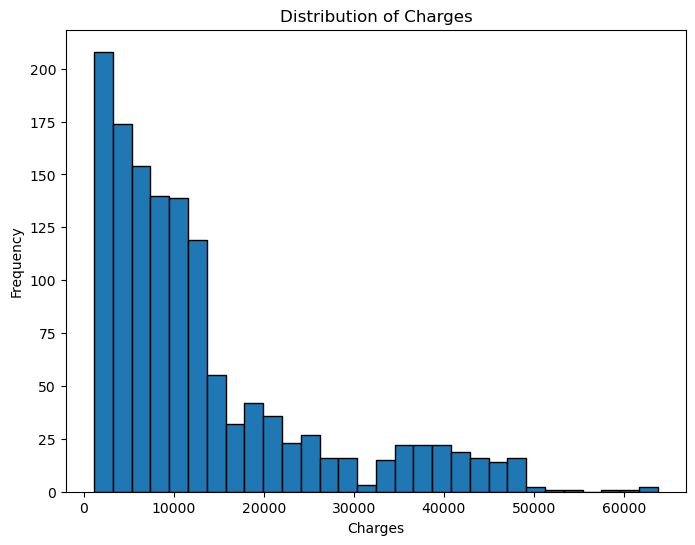

In [26]:
# Create a histogram for 'charges'
plt.figure(figsize=(8, 6))
plt.hist(data['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

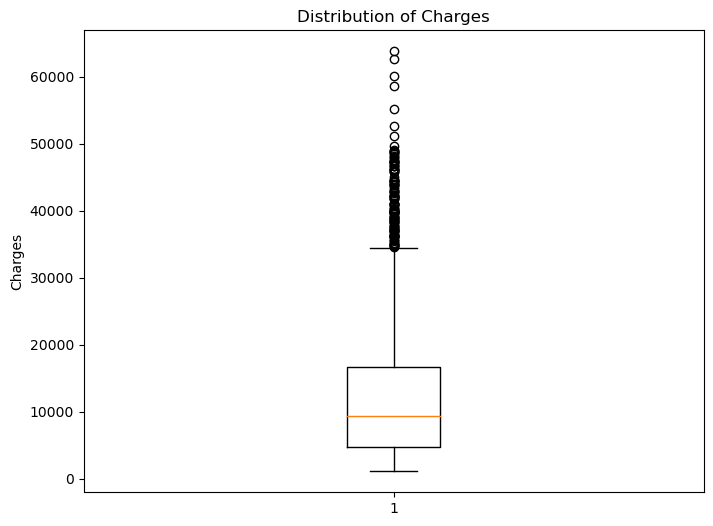

In [27]:
import matplotlib.pyplot as plt

# Create a box plot for 'charges'
plt.figure(figsize=(8, 6))
plt.boxplot(data['charges'])
plt.title('Distribution of Charges')
plt.ylabel('Charges')
plt.show()

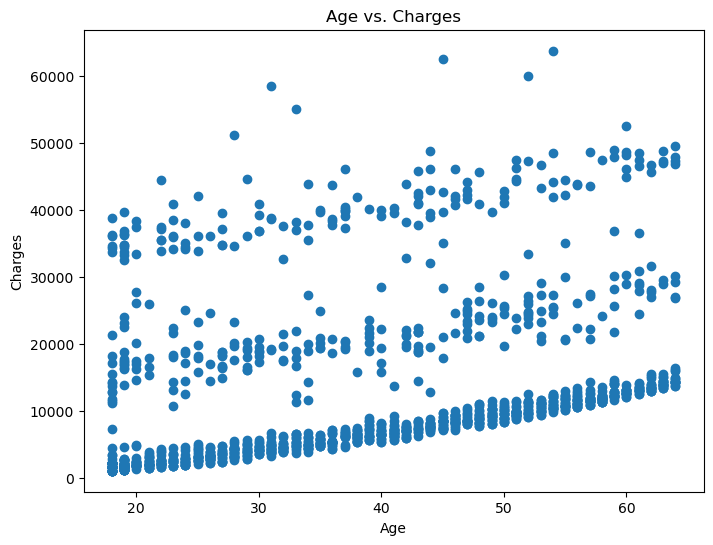

In [28]:
# Create a scatter plot for 'age' vs. 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['charges'])
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

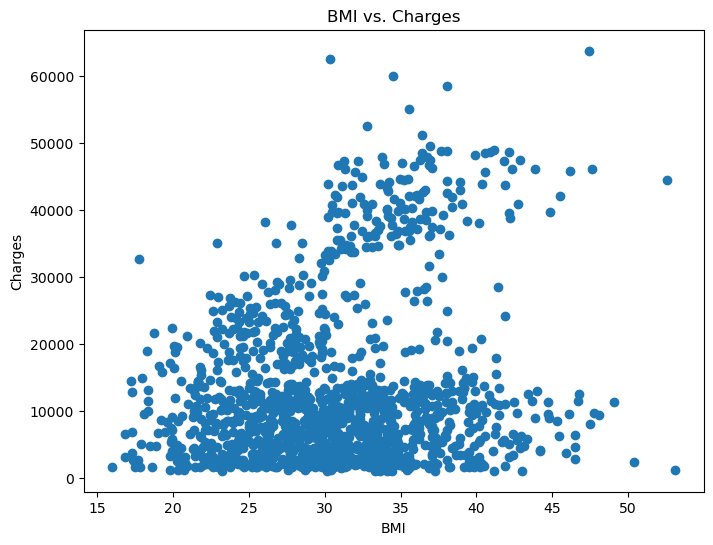

In [29]:
# Create a scatter plot for 'bmi' vs. 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'])
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

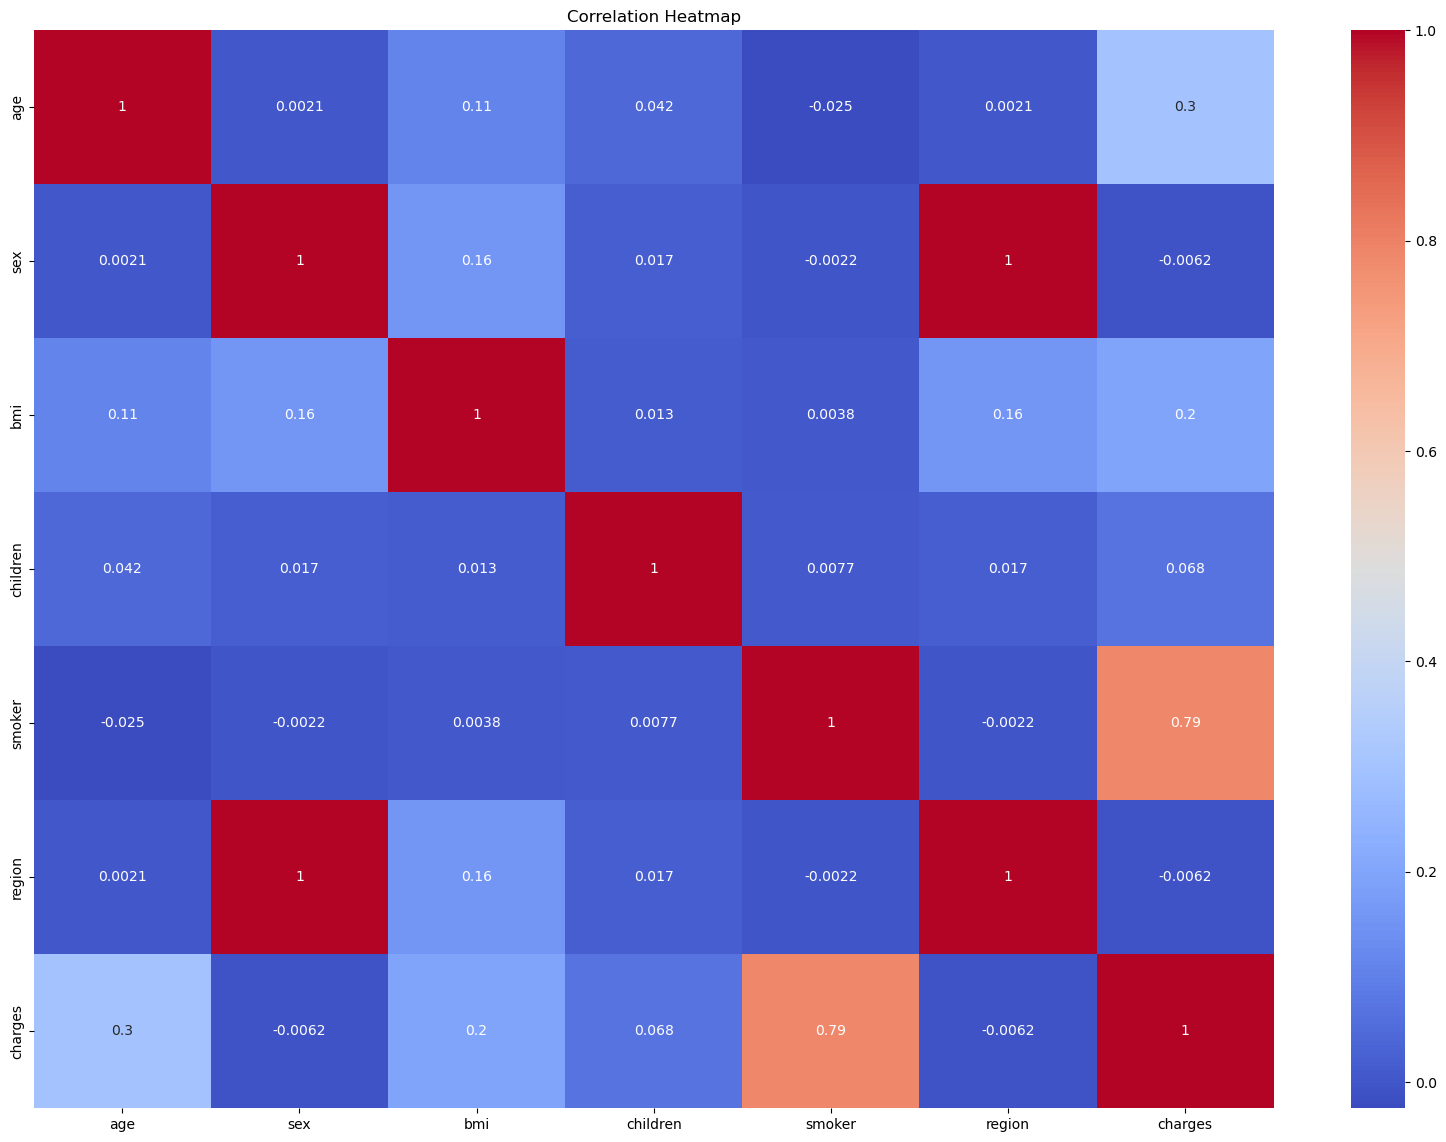

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Create the correlation heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data splitting

In [34]:
X = data.drop(columns='charges',axis=1)
y = data['charges']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=23)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (936, 6) (402, 6)


# Random Forest

In [38]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor with the correct 'criterion' parameter
model = RandomForestRegressor(criterion='squared_error')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best model for prediction
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.8617536343415078


In [39]:
y_pred = best_model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)*100
print("R-squared Score:", r2)

R-squared Score: 84.14428107877026


# BULDING THE PREDICTION SYSTEM

In [46]:
input_data = (19,0,27.9,0,1,3)  # Replace with your own values
input_data_array = np.asarray(input_data)

# Reshape the data for one instance
input_data_reshaped = input_data_array.reshape(1, -1)

# Make predictions using the trained model
prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost: ', str(prediction))

Predicted Medical Insurance Cost:  [56951.8329325]


# Saving the trained model

import pickle

filename = 'medical_insurance_cost_predictor.sav'
pickle.dump(model, open(filename,'wb')) 